In [1]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import seaborn as sns


df = pd.read_csv('../data/gedichtenGGD_STCN_Steur_stripped.csv', sep=';', index_col=0)
print(df.shape)

(3697, 31)


In [2]:
df.columns

Index(['Database', 'Jaar', 'Bruidegom', 'Bruid', 'Bruidspaar', 'Drukker',
       'Plaats_druk', 'Plaats_huwelijk', 'Auteur1', 'Auteur2', 'Auteur3',
       'Auteur4', 'Auteur5', 'Auteur6', 'Auteur7', 'Auteur8', 'Auteur9',
       'Auteur10', 'Auteur11', 'Auteur12', 'Auteur13', 'Auteur14', 'Auteur15',
       'Auteur16', 'Auteur17', 'Auteur18', 'Auteur19', 'Auteur20', 'Auteur21',
       'Auteur22', 'Alleauteurs'],
      dtype='object')

In [3]:
df.groupby('Database')['Database'].count()

Database
KB       3382
STCN      267
Steur      48
Name: Database, dtype: int64

In [4]:
#df['Alleauteurs'] = df[df.columns[8:30]].apply(
    #lambda x: ', '.join(x.dropna().astype(str)),
    #axis=1)

In [5]:
df.head()

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur14,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs
0,,,,,,,,,,,,,,,,,,,,,
1,KB,1691.0,Samuel van der Lanen,Maria Magdalena Meermans,Samuel van der Lanen & Maria Magdalena Meermans,Reinier Leers,Rotterdam,Hoorn,Pieter Rabus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pieter Rabus
2,KB,1738.0,Jacobus Willemsen,Elizabeth Verwout Noiret,Jacobus Willemsen & Elizabeth Verwout Noiret,Petrus Dathenus,Middelburg,Amsterdam,Pieter de La Ruë,Johannes Plevier,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pieter de La Ruë, Johannes Plevier, Isaac Scho..."
3,KB,1744.0,Johan Schorer,Petronella Maria de Beaufort,Johan Schorer & Petronella Maria de Beaufort,Petrus Dathenus,Middelburg,Amsterdam,David Fiers Kappeine,Johan Steengracht,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"David Fiers Kappeine, Johan Steengracht, Lucas..."
4,KB,1693.0,Pieter Koolaert,Elizabeth Hoofman,Pieter Koolaert & Elizabeth Hoofman,Lescailje,Amsterdam,Haarlem,Katharina Lescailje,David van Hoogstraten,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Katharina Lescailje, David van Hoogstraten, Jo..."
5,KB,1702.0,Herman Lufneu,Anna Amsincq,Herman Lufneu & Anna Amsincq,Barent Bos,Rotterdam,Wesel,David van Hoogstraten,Willem Rabus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"David van Hoogstraten, Willem Rabus"


In [6]:
authors = df['Alleauteurs'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

In [7]:
authors.sum(axis = 0, skipna = True)

7681

In [8]:
#df.to_csv('gedichtenGGD_STCN_Steur_stripped.csv', sep=';')

In [9]:
couples = df.groupby('Bruidspaar')['Bruidspaar'].count().sort_values(ascending=False)

In [10]:
couples.sum(axis = 0, skipna = True)

3697

In [11]:
#df1.to_csv('Allebruidsparen.csv', sep='\t')

In [12]:
df.head()

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur14,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs
0,,,,,,,,,,,,,,,,,,,,,
1,KB,1691.0,Samuel van der Lanen,Maria Magdalena Meermans,Samuel van der Lanen & Maria Magdalena Meermans,Reinier Leers,Rotterdam,Hoorn,Pieter Rabus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pieter Rabus
2,KB,1738.0,Jacobus Willemsen,Elizabeth Verwout Noiret,Jacobus Willemsen & Elizabeth Verwout Noiret,Petrus Dathenus,Middelburg,Amsterdam,Pieter de La Ruë,Johannes Plevier,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pieter de La Ruë, Johannes Plevier, Isaac Scho..."
3,KB,1744.0,Johan Schorer,Petronella Maria de Beaufort,Johan Schorer & Petronella Maria de Beaufort,Petrus Dathenus,Middelburg,Amsterdam,David Fiers Kappeine,Johan Steengracht,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"David Fiers Kappeine, Johan Steengracht, Lucas..."
4,KB,1693.0,Pieter Koolaert,Elizabeth Hoofman,Pieter Koolaert & Elizabeth Hoofman,Lescailje,Amsterdam,Haarlem,Katharina Lescailje,David van Hoogstraten,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Katharina Lescailje, David van Hoogstraten, Jo..."
5,KB,1702.0,Herman Lufneu,Anna Amsincq,Herman Lufneu & Anna Amsincq,Barent Bos,Rotterdam,Wesel,David van Hoogstraten,Willem Rabus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"David van Hoogstraten, Willem Rabus"


In [13]:
df_year = df[(df['Jaar'] >= 1600)
& (df['Jaar'] <= 1760)]

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


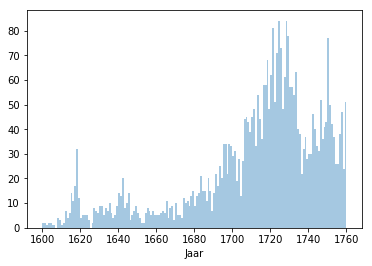

In [14]:
sns.distplot(df_year['Jaar'], kde=False, bins=160)
plt.savefig('histyear.png', dpi=300)

In [15]:
df.isna().sum()

Database              0
Jaar                 17
Bruidegom             0
Bruid                 0
Bruidspaar            0
Drukker            1565
Plaats_druk        1572
Plaats_huwelijk     924
Auteur1             664
Auteur2            2204
Auteur3            2661
Auteur4            2995
Auteur5            3221
Auteur6            3365
Auteur7            3475
Auteur8            3550
Auteur9            3595
Auteur10           3640
Auteur11           3663
Auteur12           3676
Auteur13           3687
Auteur14           3690
Auteur15           3692
Auteur16           3696
Auteur17           3696
Auteur18           3696
Auteur19           3696
Auteur20           3696
Auteur21           3696
Auteur22           3696
Alleauteurs         663
dtype: int64

In [16]:
df['n_authors'] = df.loc[:, 'Auteur1':'Auteur22'].count(axis=1)

In [17]:
df.head()

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs,n_authors
0,,,,,,,,,,,,,,,,,,,,,
1,KB,1691.0,Samuel van der Lanen,Maria Magdalena Meermans,Samuel van der Lanen & Maria Magdalena Meermans,Reinier Leers,Rotterdam,Hoorn,Pieter Rabus,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pieter Rabus,1
2,KB,1738.0,Jacobus Willemsen,Elizabeth Verwout Noiret,Jacobus Willemsen & Elizabeth Verwout Noiret,Petrus Dathenus,Middelburg,Amsterdam,Pieter de La Ruë,Johannes Plevier,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pieter de La Ruë, Johannes Plevier, Isaac Scho...",10
3,KB,1744.0,Johan Schorer,Petronella Maria de Beaufort,Johan Schorer & Petronella Maria de Beaufort,Petrus Dathenus,Middelburg,Amsterdam,David Fiers Kappeine,Johan Steengracht,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"David Fiers Kappeine, Johan Steengracht, Lucas...",4
4,KB,1693.0,Pieter Koolaert,Elizabeth Hoofman,Pieter Koolaert & Elizabeth Hoofman,Lescailje,Amsterdam,Haarlem,Katharina Lescailje,David van Hoogstraten,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Katharina Lescailje, David van Hoogstraten, Jo...",6
5,KB,1702.0,Herman Lufneu,Anna Amsincq,Herman Lufneu & Anna Amsincq,Barent Bos,Rotterdam,Wesel,David van Hoogstraten,Willem Rabus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"David van Hoogstraten, Willem Rabus",2


In [18]:
n_authors_year = df.groupby('Jaar')['n_authors'].mean()

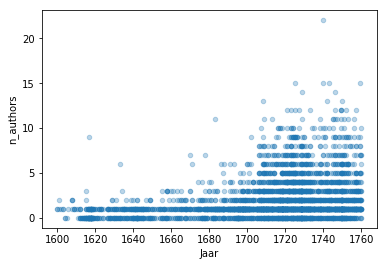

In [21]:
import seaborn as sns
df.plot.scatter(x="Jaar", y="n_authors", alpha=0.3)